In [1]:
import os
import glob
import sys

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from eda_helpers import plot_bargraph_with_groupings, plot_images

base_path = '../../data/Edible_wild_plants/datasets'

## Extract train dataset

In [2]:
train_base = os.path.join(base_path, 'dataset')

train_df = pd.DataFrame(columns=['image', 'label', 'class'])
classes = []
i = 0
for dir_name in os.listdir(train_base):
    className = '-'.join(dir_name.split(' '))
    classes.append(className)
    
    images = []
    for class_dir in os.scandir(os.path.join(train_base, dir_name)):
        images.append([class_dir.path, className, i])
            
    train_class_df = pd.DataFrame(np.array(images), columns=['image', 'label', 'class'])
    
    train_df = train_df.append(train_class_df)
    i += 1
    
train_df = train_df.reset_index(drop=True)

In [3]:
train_df.head(5)

,image,label,class
0,../../data/Edible_wild_plants/datasets/dataset...,Herb-Robert,0
1,../../data/Edible_wild_plants/datasets/dataset...,Herb-Robert,0
2,../../data/Edible_wild_plants/datasets/dataset...,Herb-Robert,0
3,../../data/Edible_wild_plants/datasets/dataset...,Herb-Robert,0
4,../../data/Edible_wild_plants/datasets/dataset...,Herb-Robert,0


## Extract test dataset

In [4]:
test_base = os.path.join(base_path, 'dataset-test')

test_df = pd.DataFrame(columns=['image', 'label', 'class'])
for dir_name in os.listdir(test_base):
    className = '-'.join(dir_name.split(' '))
    
    images = []
    for class_dir in os.scandir(os.path.join(test_base, dir_name)):
        images.append([class_dir.path, className, classes.index(className)])
            
    test_class_df = pd.DataFrame(np.array(images), columns=['image', 'label', 'class'])
    
    test_df = test_df.append(test_class_df)
    i += 1
test_df = test_df.reset_index(drop=True)

In [5]:
test_df.head(5)

,image,label,class
0,../../data/Edible_wild_plants/datasets/dataset...,Herb-Robert,0
1,../../data/Edible_wild_plants/datasets/dataset...,Herb-Robert,0
2,../../data/Edible_wild_plants/datasets/dataset...,Herb-Robert,0
3,../../data/Edible_wild_plants/datasets/dataset...,Herb-Robert,0
4,../../data/Edible_wild_plants/datasets/dataset...,Herb-Robert,0


## Train Dataset Examples

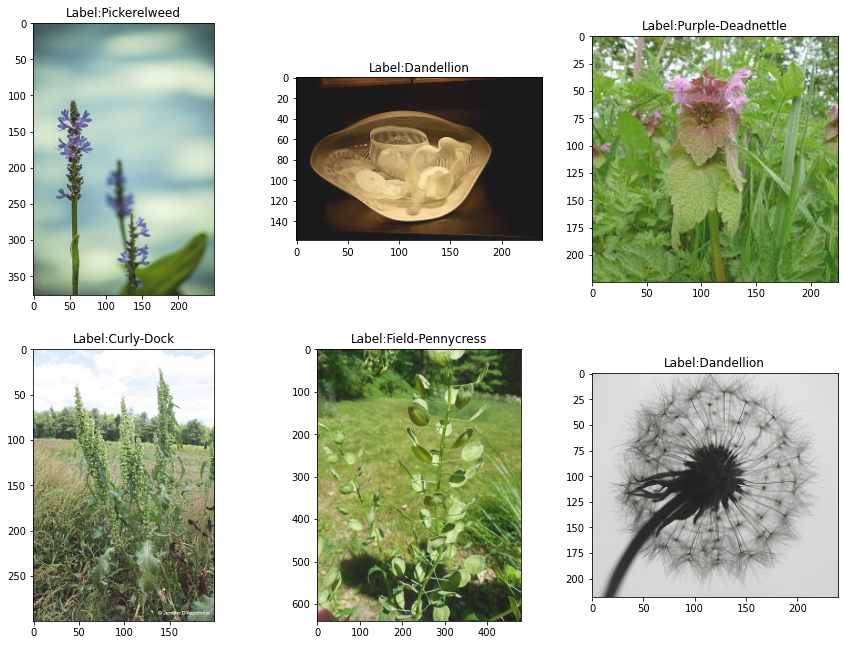

In [6]:
plot_images(train_df, '')

## Train Data Distribution

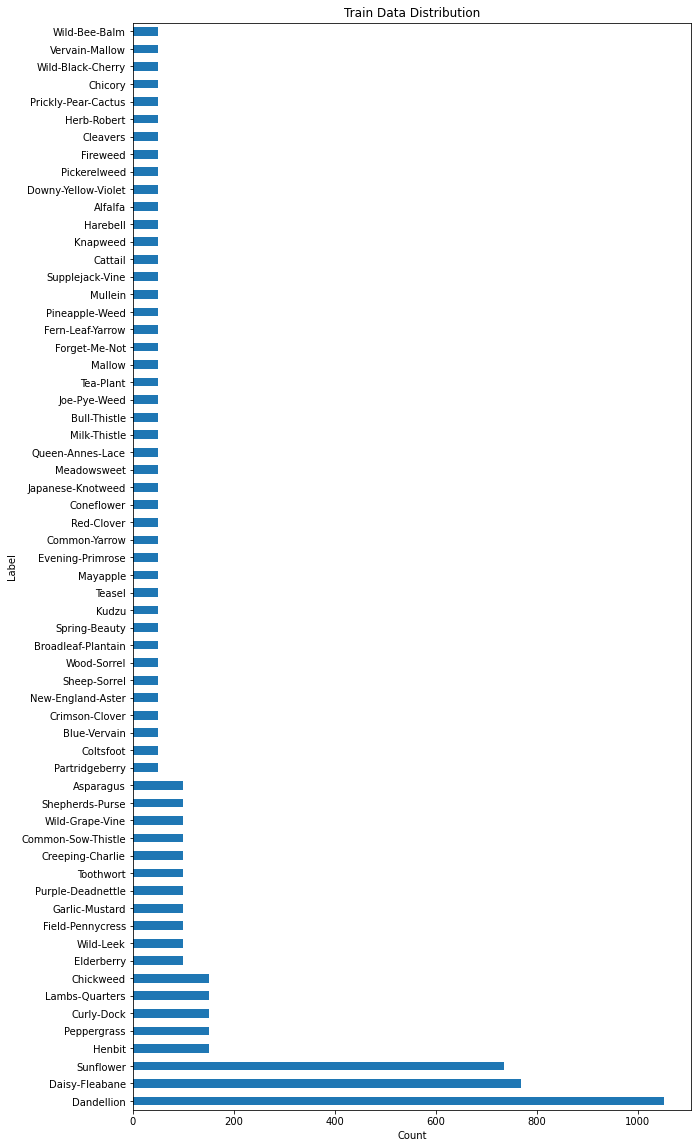

In [11]:
plot_bargraph_with_groupings(train_df, 'label', 'Train Data Distribution', 'Count', 'Label')

In [12]:
train_df['label'].value_counts()

Dandellion             1053
Daisy-Fleabane          770
Sunflower               735
Henbit                  150
Peppergrass             150
                       ... 
Prickly-Pear-Cactus      50
Chicory                  50
Wild-Black-Cherry        50
Vervain-Mallow           50
Wild-Bee-Balm            50
Name: label, Length: 62, dtype: int64

In [13]:
train_df.describe()

,image,label,class
count,6558,6558,6558
unique,6558,62,62
top,../../data/Edible_wild_plants/datasets/dataset...,Dandellion,36
freq,1,1053,1053


## Test Data Distribution

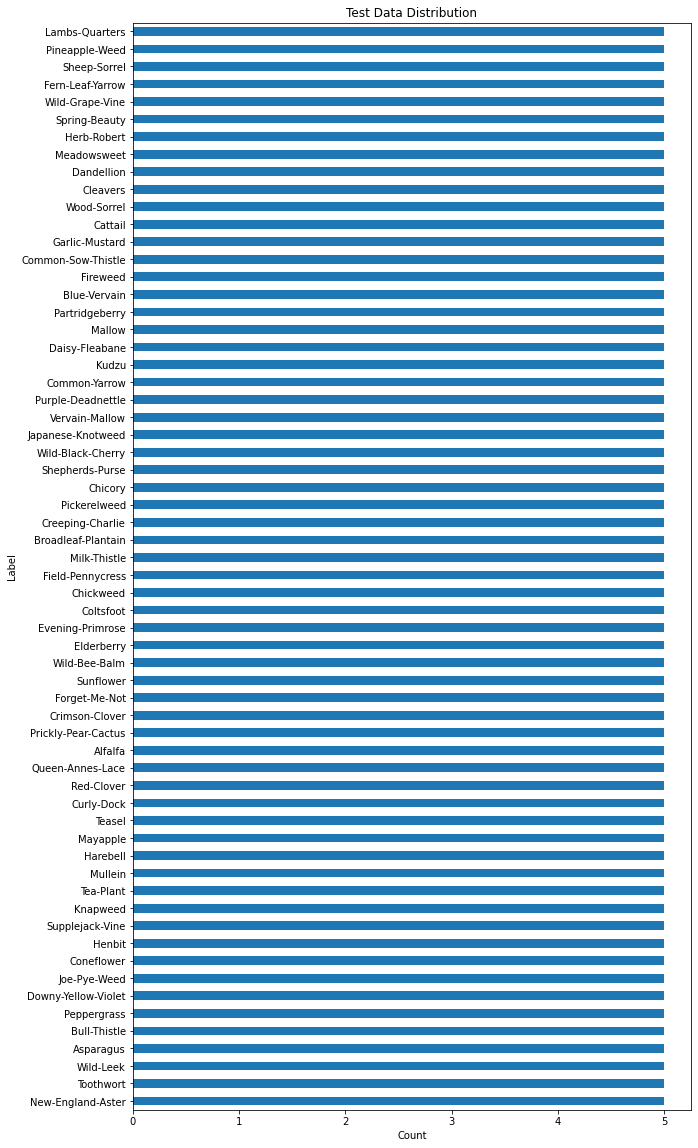

In [14]:
plot_bargraph_with_groupings(test_df, 'label', 'Test Data Distribution', 'Count', 'Label')

In [34]:
test_df['label'].value_counts()

Sunflower         5
Fireweed          5
Common-Yarrow     5
Coltsfoot         5
Kudzu             5
                 ..
Daisy-Fleabane    5
Blue-Vervain      5
Wild-Leek         5
Garlic-Mustard    5
Dandellion        5
Name: label, Length: 62, dtype: int64

In [36]:
test_df.describe()

,image,label,class
count,310,310,310
unique,310,62,62
top,../../data/Edible_wild_plants/datasets/dataset...,Sunflower,24
freq,1,5,5
